install module

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import file

In [4]:
df=pd.read_csv("Car Sales.xlsx - car_data.csv")

explore data

In [6]:
df.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [7]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [13]:
df.shape

(23906, 16)

In [15]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [11]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [12]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [17]:
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

Checking the categories of the categorical features

In [18]:
print("The categories in the variable 'Gender': ", end=" ")
print(df['Gender'].unique())

print("The categories in the variable 'Company': ", end=" ")
print(df['Company'].unique())

print("The categories in the variable 'Engine': ", end=" ")
print(df['Engine'].unique())

print("The categories in the variable 'Transmission': ", end=" ")
print(df['Transmission'].unique())

print("The categories in the variable 'Color': ", end=" ")
print(df['Color'].unique())

print("The categories in the variable 'Body Style': ", end=" ")
print(df['Body Style'].unique())

print("The categories in the variable 'Dealer_Region': ", end=" ")
print(df['Dealer_Region'].unique())


The categories in the variable 'Gender':  ['Male' 'Female']
The categories in the variable 'Company':  ['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Chevrolet'
 'Nissan' 'Mercury' 'BMW' 'Chrysler' 'Subaru' 'Hyundai' 'Honda' 'Infiniti'
 'Audi' 'Porsche' 'Volkswagen' 'Buick' 'Saturn' 'Mercedes-B' 'Jaguar'
 'Volvo' 'Pontiac' 'Lincoln' 'Oldsmobile' 'Lexus' 'Plymouth' 'Saab' 'Jeep']
The categories in the variable 'Engine':  ['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
The categories in the variable 'Transmission':  ['Auto' 'Manual']
The categories in the variable 'Color':  ['Black' 'Red' 'Pale White']
The categories in the variable 'Body Style':  ['SUV' 'Passenger' 'Hatchback' 'Hardtop' 'Sedan']
The categories in the variable 'Dealer_Region':  ['Middletown' 'Aurora' 'Greenville' 'Pasco' 'Janesville' 'Scottsdale'
 'Austin']


In [19]:
# This specific type of Engine name is 'DoubleÂ\xa0Overhead Camshaft' -> 'Double Overhead Camshaft'
print(df['Engine'].value_counts()['DoubleÂ\xa0Overhead Camshaft'])

# Replace occurrences
df['Engine'] = df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')

# Confirming the replacement
print(df['Engine'].unique())

12571
['Double Overhead Camshaft' 'Overhead Camshaft']


In [20]:
# Now, defining Numerical and Categorical Features :
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# Names of Numeric and Categorical Features:
print('We have {} numerical features: {}'.format(len(num_feature), num_feature))
print('We have {} categorical features: {}'.format(len(cat_feature), cat_feature))


We have 3 numerical features: ['Annual Income', 'Price ($)', 'Phone']
We have 13 categorical features: ['Car_id', 'Date', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']


As we can see there are some features that are not very useful that we can remove :

Phone
Car_id
Customer Name
Dealer Name
Dealer_No

In [21]:
drop_col = ['Phone','Car_id','Customer Name','Dealer_Name','Dealer_No ']
df = df.drop(drop_col,axis=1)

In [22]:
df.head()

,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


Data Visualization and Interpretation :
Graphs
Plots
Realtional Graphs
Univariate and Bivariate Analysis

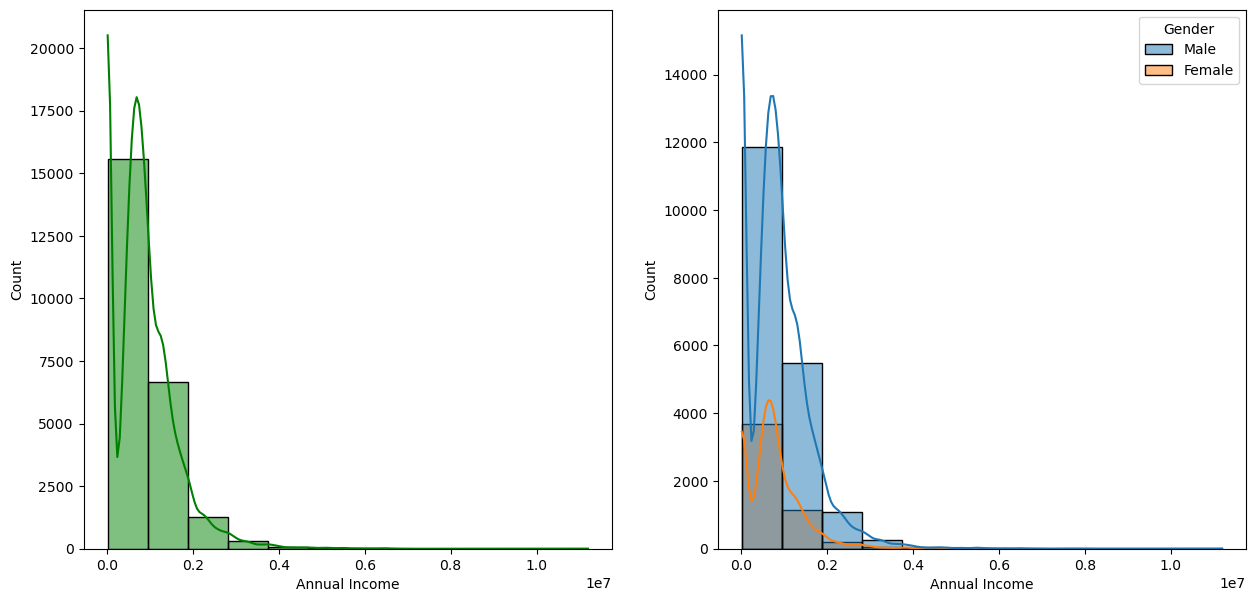

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df,x='Annual Income',bins=12,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='Annual Income',bins=12,kde=True,hue='Gender')
plt.show()

In [25]:
min_salary = df['Annual Income'].min()
max_salary = df['Annual Income'].max()
print("The minimum salary (Annual) of a person that bought the car = {}".format(min_salary))
print("The maximum salary (Annual) of a person that bought the car = {}".format(max_salary))

The minimum salary (Annual) of a person that bought the car = 10080
The maximum salary (Annual) of a person that bought the car = 11200000


<Axes: xlabel='Gender', ylabel='count'>

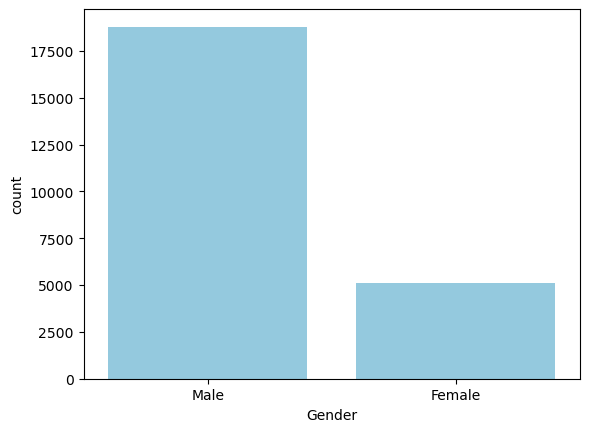

In [26]:
sns.countplot(df,x='Gender',color='skyblue')

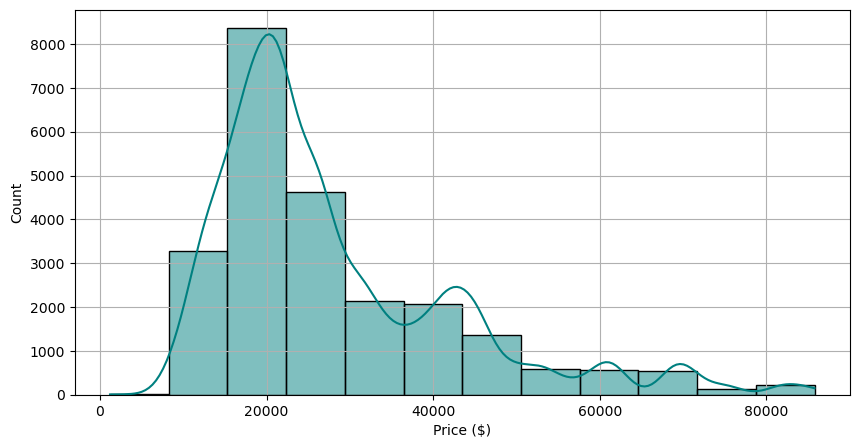

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.subplot(111)
sns.histplot(df,x='Price ($)',bins=12,kde=True,color='teal')
plt.grid()
plt.show()

<Axes: xlabel='count', ylabel='Company'>

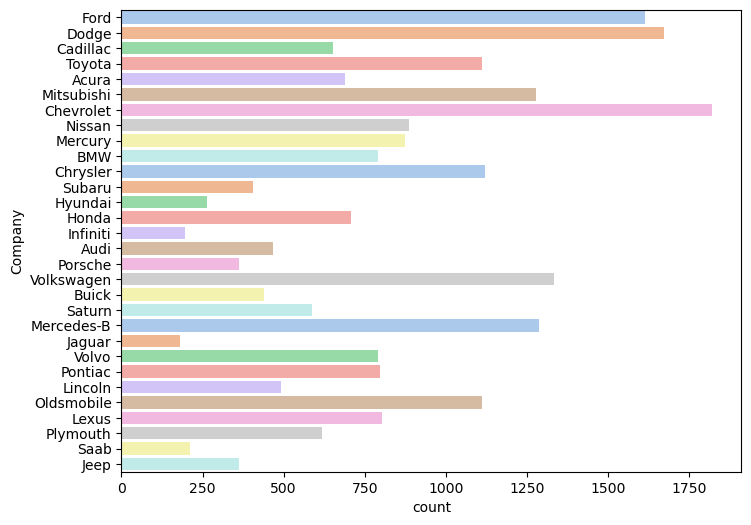

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(df,y='Company',palette = 'pastel')

<Axes: xlabel='count', ylabel='Model'>

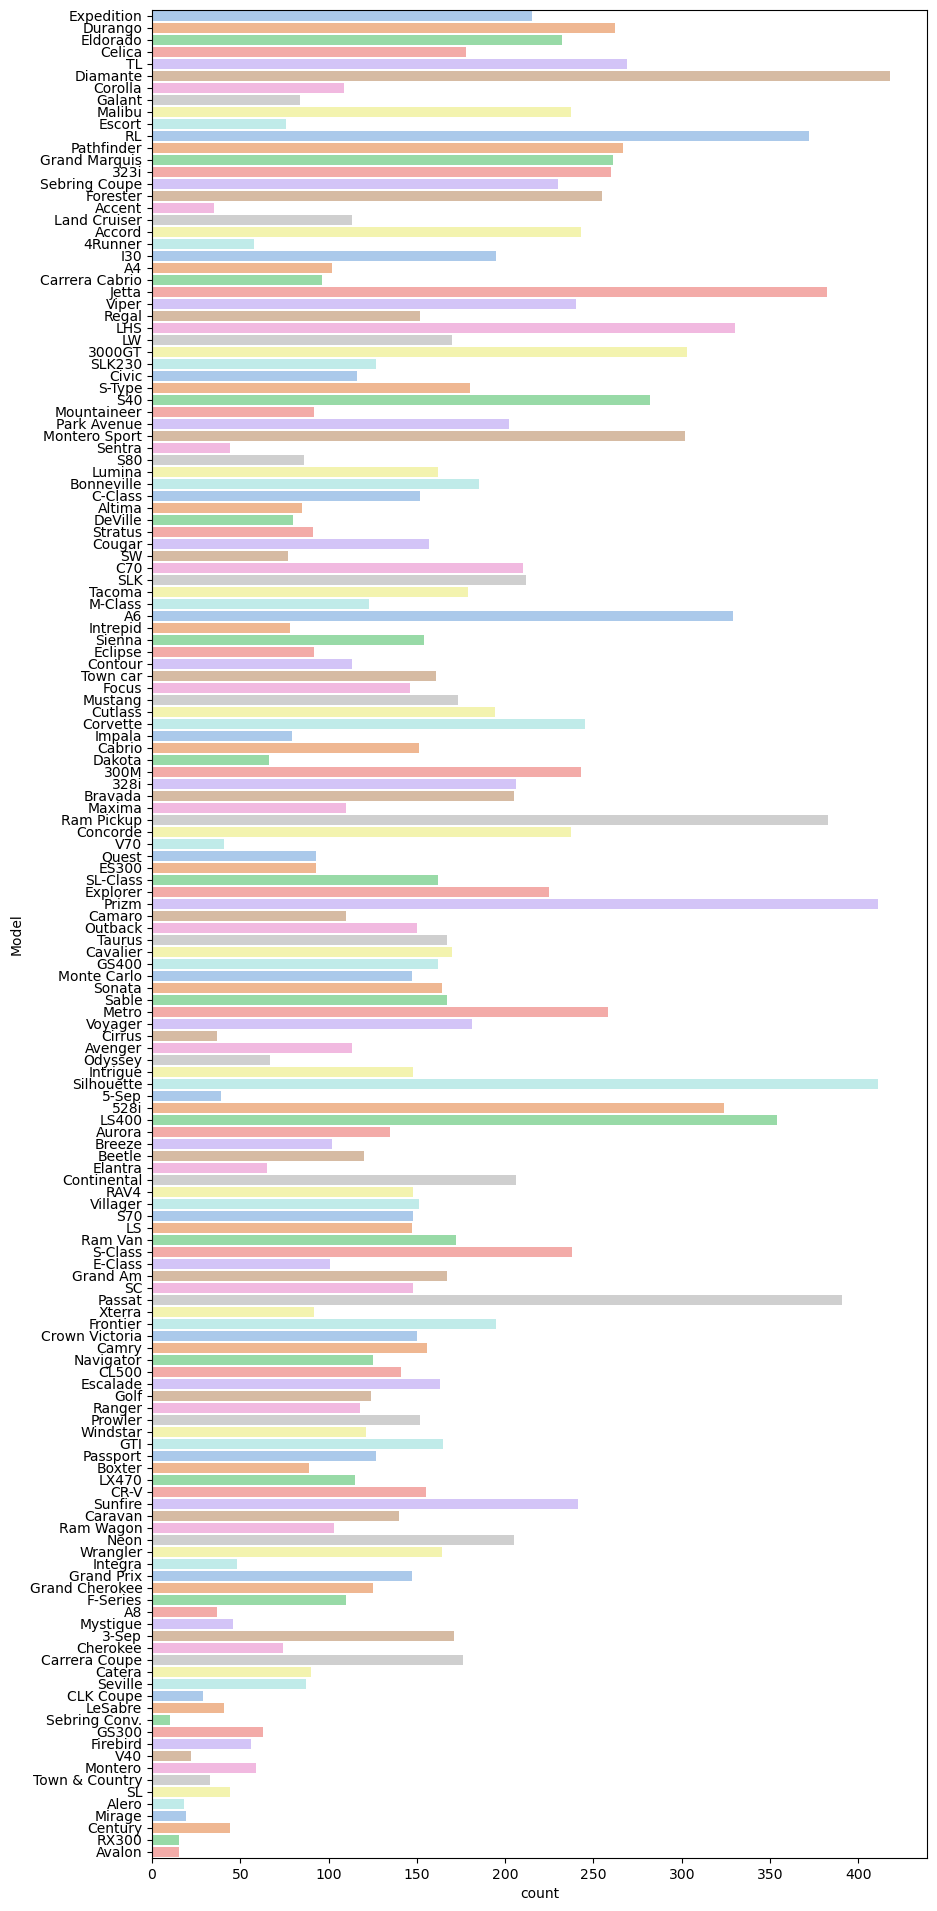

In [29]:
plt.figure(figsize=(10, 24))
sns.countplot(df,y='Model',palette = 'pastel')

<Axes: xlabel='Engine', ylabel='count'>

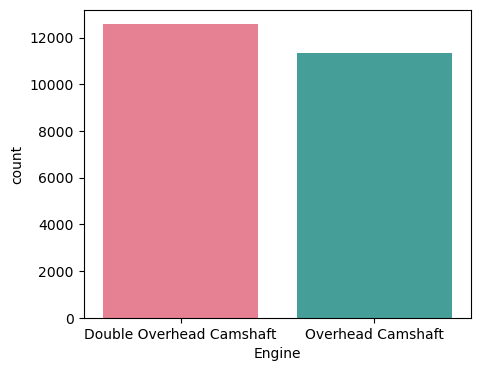

In [30]:
plt.figure(figsize=(5, 4))
sns.countplot(df,x='Engine',palette='husl')

<Axes: xlabel='Transmission', ylabel='count'>

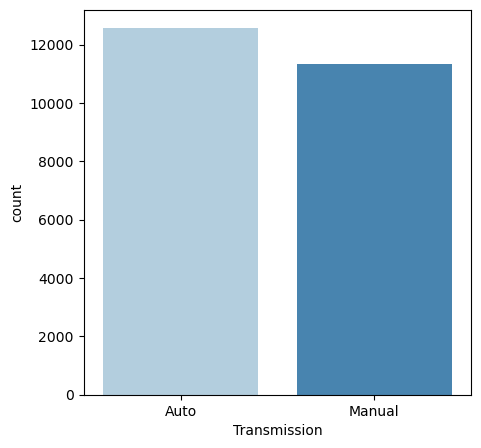

In [31]:
plt.figure(figsize=(5, 5))
sns.countplot(df,x='Transmission',palette = 'Blues')

<Axes: xlabel='Color', ylabel='count'>

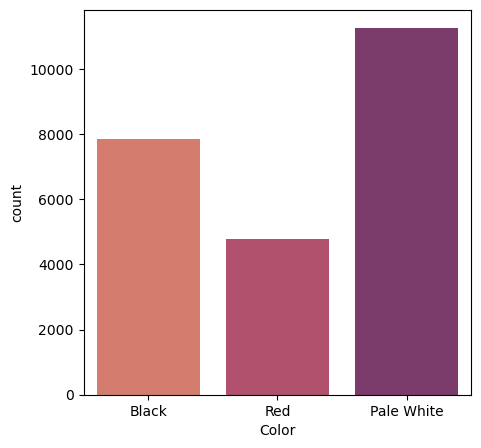

In [32]:
plt.figure(figsize=(5, 5))
sns.countplot(df,x='Color',palette = 'flare')

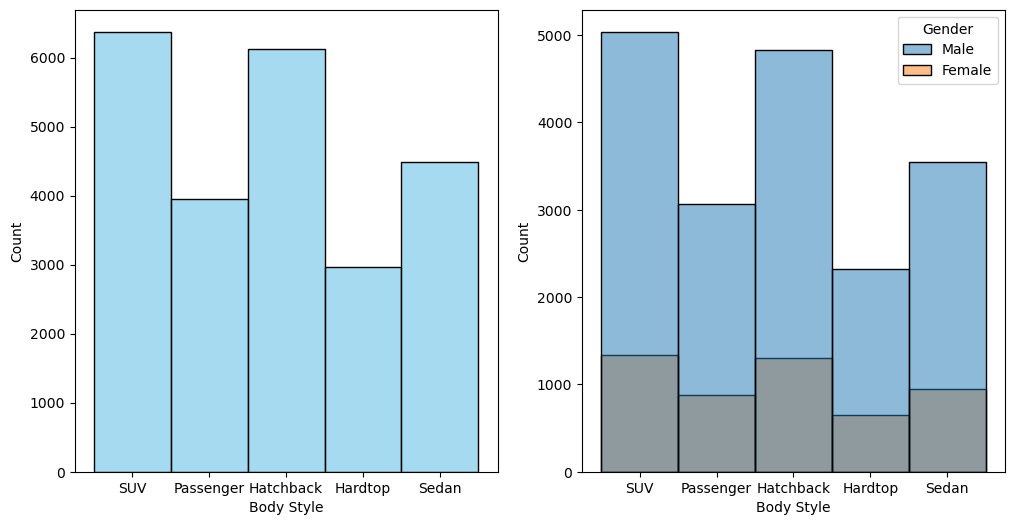

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(df,x='Body Style',color='skyblue')
plt.subplot(122)
sns.histplot(df,x='Body Style',hue='Gender')
plt.show()

<Axes: xlabel='Dealer_Region', ylabel='count'>

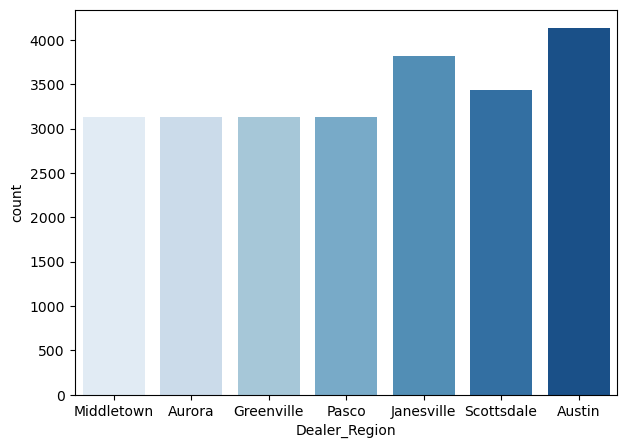

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(df,x='Dealer_Region',palette = 'Blues')

Conclusion :

Top 5 Companies - Chevrolet, Dodge, Ford, Volkswagen, Mitsubishi

Prefered Engine - Double Overhead Camshaft

Prefered Transmission - Auto

Most Liked Color of Cars - Pale White

Most Cars sold in Price range - 15,000 USD to 40,000 USD

Highest Sales Regions - Austin, Janesville, Scottsdale

People's Favourite Body Style - SUV and HatchBack

In [36]:
df.columns

Index(['Date', 'Gender', 'Annual Income', 'Company', 'Model', 'Engine',
       'Transmission', 'Color', 'Price ($)', 'Body Style', 'Dealer_Region'],
      dtype='object')

In [39]:
df1=pd.read_csv("Car Sales.xlsx - car_data.csv")

In [41]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [44]:
df1[['month', 'day', 'year']] = df['Date'].str.split('/', n=2, expand=True)
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,month,day,year
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,1,2,2022
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1,2,2022
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1,2,2022
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,1,2,2022
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1,2,2022


In [45]:
model_df = df1[['Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region', 'month', 'day', 'year']]

In [46]:
model_df = df1[['Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region', 'month', 'day', 'year']]

In [47]:
bins = np.arange(0,df1['Annual Income'].max() + 1, 200000)
df1['bin'] = pd.cut(df1['Annual Income'], bins)
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,month,day,year,bin
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,1,2,2022,"(0, 200000]"
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1,2,2022,"(1400000, 1600000]"
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1,2,2022,"(1000000, 1200000]"
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,1,2,2022,"(0, 200000]"
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1,2,2022,"(1400000, 1600000]"


In [54]:
le = LabelEncoder()

col_list = ['Gender', 'Dealer_Name', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style']
for colsn in col_list:
    df1[colsn] = le.fit_transform(df1[colsn].astype(str))

df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,month,day,year,bin
0,C_CND_000001,1/2/2022,Geraldine,1,13500,0,8,Expedition,0,0,0,26000,06457-3834,3,8264678,Middletown,1,2,2022,"(0, 200000]"
1,C_CND_000002,1/2/2022,Gia,1,1480000,1,7,Durango,0,0,0,19000,60504-7114,3,6848189,Aurora,1,2,2022,"(1400000, 1600000]"
2,C_CND_000003,1/2/2022,Gianna,1,1035000,2,4,Eldorado,1,1,2,31500,38701-8047,2,7298798,Greenville,1,2,2022,"(1000000, 1200000]"
3,C_CND_000004,1/2/2022,Giselle,1,13500,4,27,Celica,1,1,1,14000,99301-3882,3,6257557,Pasco,1,2,2022,"(0, 200000]"
4,C_CND_000005,1/2/2022,Grace,1,1465000,3,0,TL,0,0,2,24500,53546-9427,1,7081483,Janesville,1,2,2022,"(1400000, 1600000]"


In [56]:
le = LabelEncoder()
col_list = ['bin']

for colsn in col_list:
    df1[colsn] = le.fit_transform(df1[colsn].astype(str))

df1.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,month,day,year,bin
0,C_CND_000001,1/2/2022,Geraldine,1,13500,0,8,Expedition,0,0,0,26000,06457-3834,3,8264678,Middletown,1,2,2022,0
1,C_CND_000002,1/2/2022,Gia,1,1480000,1,7,Durango,0,0,0,19000,60504-7114,3,6848189,Aurora,1,2,2022,4
2,C_CND_000003,1/2/2022,Gianna,1,1035000,2,4,Eldorado,1,1,2,31500,38701-8047,2,7298798,Greenville,1,2,2022,1
3,C_CND_000004,1/2/2022,Giselle,1,13500,4,27,Celica,1,1,1,14000,99301-3882,3,6257557,Pasco,1,2,2022,0
4,C_CND_000005,1/2/2022,Grace,1,1465000,3,0,TL,0,0,2,24500,53546-9427,1,7081483,Janesville,1,2,2022,4


In [57]:
model_df = df1[['Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region', 'month', 'day', 'year', 'bin', 'Price ($)']]
#Gender, Annual Income, Engine Preference, Transmission, Color and Body Style
X = model_df[['Gender', 'Engine', 'Transmission', 'Color', 'Body Style']]
y = model_df['Company']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2342)

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

score = decision_tree.score(X_test, y_test)

print("DecisionTreeClassifier accuracy is " +  str(score))

DecisionTreeClassifier accuracy is 0.14957336456416262


In [58]:
from sklearn.ensemble import RandomForestClassifier

X = model_df[['Gender','Engine', 'Transmission', 'Color', 'Body Style', 'bin']]
y = model_df['Company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2342)

rf_tree = RandomForestClassifier(n_estimators=100)
rf_tree = rf_tree.fit(X_train, y_train)
score = rf_tree.score(X_test, y_test)
print("RandomForestClassifier accuracy is " +  str(score))

RandomForestClassifier accuracy is 0.13016563493391334


In [59]:
from sklearn.ensemble import RandomForestClassifier

temp = model_df[model_df['Annual Income'] <= 250000]
temp = temp[model_df['Price ($)'] <= 250000]
X = temp[['Gender','Engine', 'Transmission', 'Color', 'Body Style', 'bin']]
y = temp['Company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2342)

rf_tree = RandomForestClassifier(n_estimators=100)
rf_tree = rf_tree.fit(X_train, y_train)
score = rf_tree.score(X_test, y_test)
print("RandomForestClassifier accuracy is " +  str(score))

RandomForestClassifier accuracy is 0.13373403456048083


C:\Users\Imron\AppData\Local\Temp\ipykernel_16852\776811716.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp[model_df['Price ($)'] <= 250000]


In [60]:
from sklearn.ensemble import RandomForestRegressor

X = model_df[['Gender','Engine', 'Transmission', 'Color', 'Body Style', 'bin', 'Company']]
y = model_df['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2342)

rf_tree = RandomForestRegressor(n_estimators=100)
rf_tree = rf_tree.fit(X_train, y_train)
score = rf_tree.score(X_test, y_test)
print("RandomForestRegressor r2 score is " +  str(score))

RandomForestRegressor r2 score is 0.4634400005344522


In [61]:
X = model_df[['Engine', 'Color', 'Body Style', 'Company']]
y = model_df['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2342)

rf_tree = RandomForestRegressor(n_estimators=100)
rf_tree = rf_tree.fit(X_train, y_train)
score = rf_tree.score(X_test, y_test)
print("RandomForestRegressor r2 score is " +  str(score))

RandomForestRegressor r2 score is 0.5522561037665448


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_tree, X_train, y_train, cv=5)
print(scores)

[0.53942561 0.56032567 0.56119735 0.59081657 0.58076905]
